<a href="https://colab.research.google.com/github/arexdevson/Metrics/blob/main/Employee_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Colaboradores / Seus comportamentos / Suas Caracteristicas



Inicialmente quero subir o arquivo, analisar pontos faltantes ou não, enxergar colunas categóricas ou numéricas, pegar estatisticas gerais

Dicionário dos dados:
<br>

Education
1 'Below College' <br>
2 'College' <br>
3 'Bachelor' <br>
4 'Master' <br>
5 'Doctor' <br>

<br>

EnvironmentSatisfaction<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'<br>

JobInvolvement<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'<br>

JobSatisfaction<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'<br>

PerformanceRating<br>
1 'Low'<br>
2 'Good'<br>
3 'Excellent'<br>
4 'Outstanding'<br>

RelationshipSatisfaction<br>
1 'Low'<br>
2 'Medium'<br>
3 'High'<br>
4 'Very High'<br>

WorkLifeBalance<br>
1 'Bad'<br>
2 'Good'<br>
3 'Better'<br>
4 'Best'<br>


# Leitura do Arquivo / Importação das bibliotecas

In [ ]:
#Subindo o arquivo
#G:\Meu Drive\Registros\Geral\PycharmProjects\Github_Projects\Data Analysis\Projeto_01

#Manusear os dataframes 
import pandas as pd

#criação de gráfcos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv('/content/HR Employee Attrition.csv',sep=',')

In [ ]:
#visualização dos dados iniciais
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#podemos separar o que queremos trabalhar

df.columns

# perguntas
# 1 - há uma relação entre a idade e a satisfação no emprego?
# 2 - pessoas do ramo medico possuem mais relatos de desgaste do que os outros campos?
# 3 - qual é a proporção de pessoal com desgaste ou não no dataset inteiro?
# 4 - pagamento mensal por departamento?
# 5 - quanto maior o tempo na empresa maior é a avaliação de performance?
# 6 - qual é a media de anos desde a ultima promoção por genero?
# 7 - qual é a distribuição do equilibrio da vida no trabalho por nivel do cargo?
# 8 - pessoas que viajam mais a trabalho são menos satisfeitas em seus relacionamentos?
# 9 - quais são as top 3 funções que ganham mais em sua receita mensal
# 10 - distribuição do grau de satisfação por departamento

#desgaste = pd.get_dummies(df[['Attrition','Department','BusinessTravel']])
#desgaste

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Avaliação do Dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Análise/Exploração dos Dados


In [ ]:
# 1 - há uma relação entre a idade e a satisfação no emprego?

quest1 = df.groupby('Age')['JobSatisfaction'].mean().reset_index()
quest1


,Age,JobSatisfaction
0,18,3.250000
1,19,2.555556
2,20,2.636364
3,21,2.692308
4,22,2.937500
5,23,2.428571
6,24,2.769231
7,25,2.692308
8,26,2.769231
9,27,2.604167


In [ ]:
quant_idade = df['Age'].value_counts().reset_index().sort_values(by='index').rename(columns = {'index':'Idade','Age':'Count Age'})
quant_idade

,Idade,Count Age
40,18,8
39,19,9
37,20,11
36,21,13
32,22,16
34,23,14
23,24,26
22,25,26
17,26,39
11,27,48


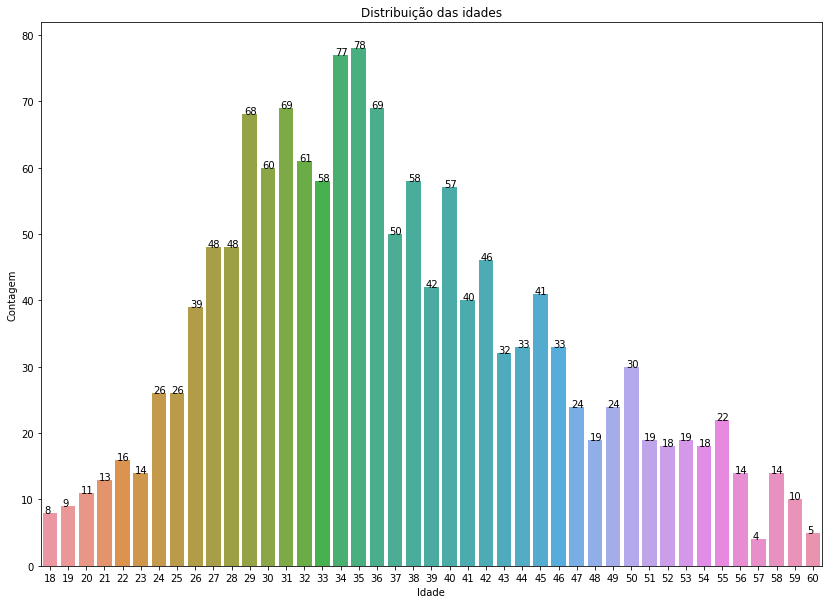

In [ ]:
fig,ax = plt.subplots(figsize=(14,10))
sns.countplot(x=df['Age'])
ax.set_title('Distribuição das idades')
ax.set_ylabel('Contagem')
ax.set_xlabel('Idade')
for c in range(0,len(quant_idade['Count Age'])):
  ax.annotate(quant_idade['Count Age'][c],(quant_idade['Idade'][c]-18.3,quant_idade['Count Age'][c]))
plt.show()

In [ ]:

fig = px.histogram(x=quest1['Age'],y=quest1['JobSatisfaction'],histfunc='avg',nbins=20)
fig.show()

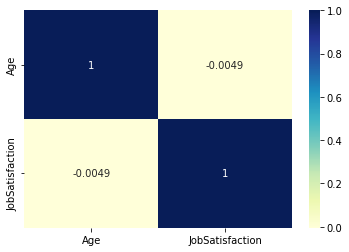

In [ ]:
correl = df[['Age','JobSatisfaction']].corr()

dataplot = sns.heatmap(correl,cmap="YlGnBu", annot=True)
plt.show()

**Resposta:** <br>
A idade e a satisfação no trabalho não estão diretamente ligados (correlação não possui papel influente) porém podemos perceber que dos 20-24 até 40-44 anos temos um aumento na média geral de satisfação do trabalho nessas idades e uma queda nos numeros / satisfação das pessoas acima dos 50 anos


In [ ]:

# 2 - pessoas do ramo medico possuem mais relatos de desgaste do que os outros campos?
#forma de setar um index - .set_index('Attrition')
df_desgaste = df.groupby(['Attrition','EducationField']).count().reset_index()


In [ ]:
df_desgaste = df_desgaste.loc[df_desgaste['Attrition']=='Yes']

In [ ]:
px.bar(df_desgaste,x='EducationField',y='Education',color='EducationField')


**Resposta:** <br>

O Attrition/Atrito(Desgaste) dos funcionários na area educacional médica foi o segundo maior 

In [ ]:
# 3 - qual é a proporção de pessoal com desgaste ou não no dataset inteiro?

df_total_desgaste = df.groupby('Attrition')['Attrition'].count()
df_total_desgaste


Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
px.pie(df_total_desgaste,values='Attrition',names=df_total_desgaste.index,title='Proporção de Desgaste')


In [ ]:
# 4 - pagamento mensal por departamento?

df_monthlyincome = df.groupby('Department')['MonthlyIncome'].sum().reset_index().sort_values(by='MonthlyIncome',ascending=False)
df_monthlyincome

,Department,MonthlyIncome
1,Research & Development,6036284
2,Sales,3103791
0,Human Resources,419234


In [ ]:
px.bar(df_monthlyincome,x='MonthlyIncome',y='Department',color='Department',orientation='h')

In [ ]:
#bonus, soma dos pagamentos mensais por idade
df_idade_monthlyincome = df.groupby('Age')['MonthlyIncome'].sum().reset_index()
px.line(df_idade_monthlyincome,x='Age',y='MonthlyIncome')

In [ ]:
# 5 - quanto maior o tempo na empresa maior é a avaliação de performance?


#PerformanceRating
#1 'Low'
#2 'Good'
#3 'Excellent'
#4 'Outstanding'

df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [ ]:
dic_performance = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}

df['PerformanceRating'] = df['PerformanceRating'].map(dic_performance)
df['PerformanceRating'].value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

In [ ]:
df_performance = df.groupby(['YearsAtCompany','PerformanceRating']).count()
df_performance

Age  Attrition  BusinessTravel  DailyRate  \
YearsAtCompany PerformanceRating                                              
0              Excellent           37         37              37         37   
               Outstanding          7          7               7          7   
1              Excellent          142        142             142        142   
               Outstanding         29         29              29         29   
2              Excellent          116        116             116        116   
...                               ...        ...             ...        ...   
34             Excellent            1          1               1          1   
36             Excellent            1          1               1          1   
               Outstanding          1          1               1          1   
37             Excellent            1          1               1          1   
40             Excellent            1          1               1          1   

                                  Department  DistanceFromHome  Education  \
YearsAtCompany PerformanceRating                                            
0              Excellent                  37                37         37   
               Outstanding                 7                 7          7   
1              Excellent                 142               142        142   
               Outstanding                29                29         29   
2              Excellent                 116               116        116   
...                                      ...               ...        ...   
34             Excellent                   1                 1          1   
36             Excellent                   1                 1          1   
               Outstanding                 1                 1          1   
37             Excellent                   1                 1          1   
40             Excellent                   1                 1          1   

                                  EducationField  EmployeeCount  \
YearsAtCompany PerformanceRating                                  
0              Excellent                      37             37   
               Outstanding                     7              7   
1              Excellent                     142            142   
               Outstanding                    29             29   
2              Excellent                     116            116   
...                                          ...            ...   
34             Excellent                       1              1   
36             Excellent                       1              1   
               Outstanding                     1              1   
37             Excellent                       1              1   
40             Excellent                       1              1   

                                  EmployeeNumber  ...  PercentSalaryHike  \
YearsAtCompany PerformanceRating                  ...                      
0              Excellent                      37  ...                 37   
               Outstanding                     7  ...                  7   
1              Excellent                     142  ...                142   
               Outstanding                    29  ...                 29   
2              Excellent                     116  ...                116   
...                                          ...  ...                ...   
34             Excellent                       1  ...                  1   
36             Excellent                       1  ...                  1   
               Outstanding                     1  ...                  1   
37             Excellent                       1  ...                  1   
40             Excellent                       1  ...                  1   

                                  RelationshipSatisfaction  StandardHours  \
YearsAtCompany PerformanceRating                                  

In [ ]:
df_performance = df_performance.reset_index().set_index('YearsAtCompany')
df_performance

,PerformanceRating,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
YearsAtCompany,,,,,,,,,,,,,,,,,,,,,
0,Excellent,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
0,Outstanding,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,Excellent,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
1,Outstanding,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
2,Excellent,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Excellent,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
36,Excellent,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
36,Outstanding,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
px.bar(df_performance,x=df_performance.index,y='Age',color='PerformanceRating',title='Analise de Performance',labels={'YearsAtCompany':'Anos na Companhia','Age':'N° Performance'})

In [ ]:
# bonus: as pessoas mais jovens são as resposnáveis por essa performance alta nos primeiros 10 anos de empresa?

df_idade_tempo_companhia = df.groupby('Age')['YearsAtCompany'].mean().reset_index().sort_values(by='YearsAtCompany',ascending=True)
df_idade_tempo_companhia



,Age,YearsAtCompany
0,18,0.000000
1,19,0.777778
2,20,1.545455
3,21,1.846154
4,22,2.062500
5,23,2.642857
6,24,3.346154
7,25,3.846154
10,28,4.375000
8,26,4.692308


Resposta:
o 1° gráfico nos traz que nos primeiros 5 anos há o pico de performance com uma pequena queda nos outros 5 anos e após o 10° ano uma grande queda.
não é positivo afirmar que os mais jovens são os mais engajados em questão de performance desses 10 anos já que a média dos anos an empresa por idade nos mostra que até os 10 primeiros anos temos pessoas desde 18 até 57 anos
 

In [ ]:
# 6 - qual é a media de anos desde a ultima promoção por genero?

df_promotion_gender = df.groupby('Gender')['YearsSinceLastPromotion'].mean().reset_index()
df_promotion_gender


,Gender,YearsSinceLastPromotion
0,Female,2.294218
1,Male,2.116780


In [ ]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

Resposta: <br>

O Numero médio de anos desde a ultima promoção para o gênero feminino é maior do que o masculino, e o dataset possui menos mulheres do que homem o que pode indicar que os homens demoram menos tempo pra ter uma promoção do que as mulheres

In [ ]:
# 7 - qual é a distribuição do equilibrio da vida no trabalho por cargo?
dic_worklife = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(dic_worklife)
df['WorkLifeBalance'].value_counts()

Excellent      893
Good           344
Outstanding    153
Low             80
Name: WorkLifeBalance, dtype: int64

In [ ]:
df_worklife_jobrole = df.groupby(['JobRole','WorkLifeBalance']).count().reset_index()
df_worklife_jobrole

,JobRole,WorkLifeBalance,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Healthcare Representative,Excellent,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
1,Healthcare Representative,Good,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2,Healthcare Representative,Low,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,Healthcare Representative,Outstanding,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
4,Human Resources,Excellent,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
5,Human Resources,Good,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
6,Human Resources,Low,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,Human Resources,Outstanding,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
8,Laboratory Technician,Excellent,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
9,Laboratory Technician,Good,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58


In [ ]:
px.bar(df_worklife_jobrole,x='JobRole',y='Age',color='WorkLifeBalance',labels={'JobRole':'Cargo','Age':'N° Classificação'})

Resposta: <br>

Os colaboradores de Sales Executive os Cientistas tem uma melhor avaliação no que diz a parte de equilibrio de vida/trabalho e os de Recursos humanos/Sales Representative são os que possuem menos equilibrio nessa questão

In [ ]:
# 8 - pessoas que viajam mais a trabalho são menos satisfeitas em seus relacionamentos?

dic_relationshipsatisfaction = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}

df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(dic_relationshipsatisfaction)
df['RelationshipSatisfaction'].value_counts()


Excellent      459
Outstanding    432
Good           303
Low            276
Name: RelationshipSatisfaction, dtype: int64

In [ ]:

df_business_relationship = df[['BusinessTravel','RelationshipSatisfaction']]

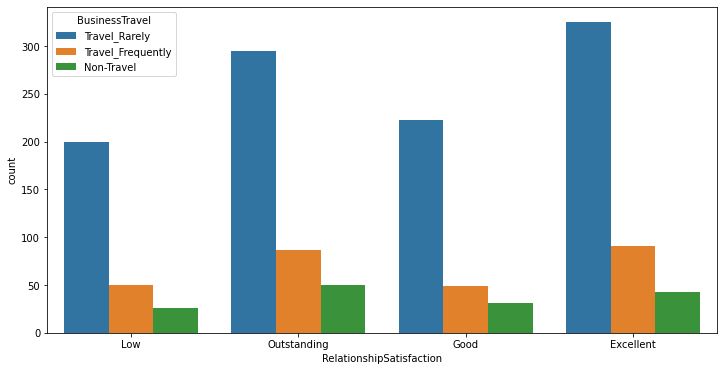

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(data=df_business_relationship,x='RelationshipSatisfaction',hue='BusinessTravel')

Resposta:
Pessoas que viajam pouco é o grande foco, são a grande maioria e a sua divisão apesar de ter o maior numero em pessoas com baixa satisfação nos demais critérios as pessoas que viajam raramente tem um bom indice de satisfação nos seus relacionamentos.


In [ ]:
# 9 - Qual o grau de satisfação do trabalho das pessoas que fazem horas extras

dic_overtimejob = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}

df['JobSatisfaction'] = df['JobSatisfaction'].map(dic_overtimejob)
df['JobSatisfaction'].value_counts()



Outstanding    459
Excellent      442
Low            289
Good           280
Name: JobSatisfaction, dtype: int64

In [ ]:

df_over_satisfaction = df[['OverTime','JobSatisfaction']]

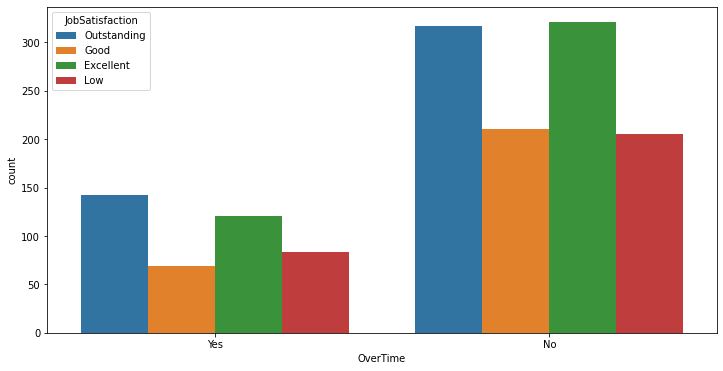

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(data=df_over_satisfaction,x='OverTime',hue='JobSatisfaction')

Resposta:

Apesar do nivel baixo de satisfação ser maior nos que não fazem horas extras os demais critérios se sobressaem sobre os que fazem horas extras, portanto, pessoas que não fazem hora extra (que possivelmente usam essas horas pra demais tarefas) são mais satisfeitas

In [ ]:
# 10 - distribuição do grau de satisfação no dataset



Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
px.pie(df,values=df['JobSatisfaction'].value_counts(),names=df['JobSatisfaction'].unique(),title='Proporção de Satisfação - Trabalho')


Resposta: <br>

81% do dataset está minimamente satisfeito com o seu trabalho o que é uma boa parcela, porém, 19% também interpreto ser uma parcela alta de um grau de insatisfação numa empresa :/